In [10]:
import utils
import pandas as pd 
from torchvision import transforms
import torch

In [11]:
fractured_train_dataset_path = "./Dataset/FracAtlas/Utilities/Fracture Split/train.csv"
non_fractured_train_dataset_path = "./Dataset/FracAtlas/Utilities/Nonfractured/All.csv"
fractured_train_frame = pd.read_csv(fractured_train_dataset_path)
non_fractured_train_frame = pd.read_csv(non_fractured_train_dataset_path)
image_dir = "./Dataset/FracAtlas/images"
json_path = "./Dataset/FracAtlas/Annotations/COCO JSON/COCO_fracture_masks.json"
non_fractured_train_frame

,image_id
0,IMG0000000.jpg
1,IMG0000001.jpg
2,IMG0000002.jpg
3,IMG0000003.jpg
4,IMG0000004.jpg
...,...
3358,IMG0004371.jpg
3359,IMG0004372.jpg
3360,IMG0004383.jpg
3361,IMG0004388.jpg


In [12]:
fractured_train_dataset = utils.CustomDataset(fractured_train_frame, image_dir=image_dir,json_path=json_path)
print(f"fractured_train_data: {len(fractured_train_dataset)}")
non_fractured_train_dataset = utils.CustomDataset(non_fractured_train_frame, image_dir=image_dir, json_path=json_path)
print(f"non_fractured_train_data: {len(non_fractured_train_dataset)}")

fractured_train_data: 574
non_fractured_train_data: 3363


In [13]:
print(len(non_fractured_train_dataset.id))
print(len(non_fractured_train_dataset.image_path))

3363
3363


In [14]:
train_dataset = fractured_train_dataset+non_fractured_train_dataset

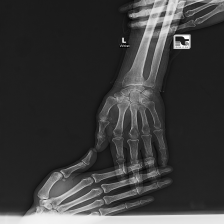

In [15]:
transforms.ToPILImage()( train_dataset[0]["image"])

In [16]:
images = torch.stack([sample["image"] for sample in train_dataset], dim=0)
std=torch.std(images)
mean= torch.mean(images)
print(f"standard deviation: {std}")
print(f"mean: {mean}")

standard deviation: 0.19048004523315898
mean: 0.19906062808256325
